Data Science Assignment

Name: Prince kashav





In [30]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor

import os
os.makedirs('/content/csv_files', exist_ok=True)
os.makedirs('/content/outputs', exist_ok=True)

print("Imports OK — numpy", np.__version__, "sklearn", __import__("sklearn").__version__)


Imports OK — numpy 2.0.2 sklearn 1.6.1


In [31]:
historical_data = 'https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
sentiment_data  = 'https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'

db = pd.read_csv(historical_data)
fg = pd.read_csv(sentiment_data)

print("Trader rows:", db.shape)
print("Sentiment rows:", fg.shape)


Trader rows: (211224, 16)
Sentiment rows: (2644, 4)


In [32]:
db.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [33]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [34]:
db.info()
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [35]:
db.info()
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [36]:
db.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [37]:
db = db.drop_duplicates()


In [38]:
db.columns.str.strip().str.replace(' ' ,'_').str.lower()

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [39]:
order_counts = db.groupby('Order ID').size().reset_index(name='Trade Count')


In [40]:
db.columns = db.columns.str.strip().str.replace(' ', '_').str.lower()
fg.columns = fg.columns.str.strip().str.lower()

print("Trader columns:", db.columns.tolist())
print("Sentiment columns:", fg.columns.tolist())
display(db.head(2))
display(fg.head(2))


Trader columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']
Sentiment columns: ['timestamp', 'value', 'classification', 'date']


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02


In [41]:
# Trader timestamps (robust)
db['timestamp_ist'] = pd.to_datetime(db['timestamp_ist'], errors='coerce', dayfirst=True)

# fallback: if many nulls and there's a numeric 'timestamp' column (epoch), use it
if db['timestamp_ist'].isna().mean() > 0.1 and 'timestamp' in db.columns:
    try:
        db['timestamp'] = pd.to_datetime(db['timestamp'], unit='s', errors='coerce')
        db['timestamp_ist'] = db['timestamp_ist'].fillna(db['timestamp'])
    except Exception:
        pass

# create date for grouping
db['date'] = db['timestamp_ist'].dt.date

# sentiment date -> to datetime.date
fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date

# quick checks
print("Null trader timestamps:", db['timestamp_ist'].isna().sum())
print("Null sentiment dates:", fg['date'].isna().sum())


Null trader timestamps: 0
Null sentiment dates: 0


In [42]:
to_numeric = ['execution_price','size_tokens','size_usd','start_position','closed_pnl','fee','trade_id','order_id','timestamp']
for c in to_numeric:
    if c in db.columns:
        db[c] = pd.to_numeric(db[c], errors='coerce')
print("Numeric conversion done.")


Numeric conversion done.


In [43]:
db = db.drop_duplicates()
db = db.dropna(subset=['date'])   # drop rows without usable date
if 'size_usd' in db.columns:
    db = db[db['size_usd'] > 0]   # remove zero/negative volume trades (optional)
print("After cleanup, rows:", db.shape)


After cleanup, rows: (211181, 17)


In [44]:
daily = db.groupby('date').agg(
    total_trades = ('trade_id','count') if 'trade_id' in db.columns else ('account','count'),
    total_volume_usd = ('size_usd','sum') if 'size_usd' in db.columns else ('size_tokens','sum'),
    avg_execution_price = ('execution_price','mean') if 'execution_price' in db.columns else ('size_usd','mean'),
    median_fee = ('fee','median') if 'fee' in db.columns else ('account','count'),
    unique_accounts = ('account', pd.Series.nunique),
    avg_closed_pnl = ('closed_pnl','mean') if 'closed_pnl' in db.columns else ('account','count')
).reset_index()

# compute win_rate if closed_pnl exists
if 'closed_pnl' in db.columns:
    win_rate = db.groupby('date')['closed_pnl'].apply(lambda x: (x>0).sum()/x.count())
    daily = daily.merge(win_rate.rename('win_rate'), on='date', how='left')

display(daily.head())


,date,total_trades,total_volume_usd,avg_execution_price,median_fee,unique_accounts,avg_closed_pnl,win_rate
0,2023-05-01,3,477.00,1898.133333,0.000000,1,0.000000,0.000000
1,2023-12-05,9,50005.83,11038.300000,0.483987,1,0.000000,0.000000
2,2023-12-14,11,113203.35,8031.868818,2.169319,1,-18.675885,0.363636
3,2023-12-15,2,10609.95,2.982000,1.326245,1,-12.316017,0.000000
4,2023-12-16,3,15348.77,0.384707,1.170034,1,0.000000,0.000000


In [45]:
fg = fg[['date','value','classification']].drop_duplicates()
fg['sentiment_group'] = fg['classification'].replace({'Extreme Fear':'Fear','Extreme Greed':'Greed'}).fillna(fg['classification'])

merged = daily.merge(fg, on='date', how='left')
print("Merged shape:", merged.shape)
display(merged.head())


Merged shape: (480, 11)


,date,total_trades,total_volume_usd,avg_execution_price,median_fee,unique_accounts,avg_closed_pnl,win_rate,value,classification,sentiment_group
0,2023-05-01,3,477.00,1898.133333,0.000000,1,0.000000,0.000000,63.0,Greed,Greed
1,2023-12-05,9,50005.83,11038.300000,0.483987,1,0.000000,0.000000,75.0,Extreme Greed,Greed
2,2023-12-14,11,113203.35,8031.868818,2.169319,1,-18.675885,0.363636,72.0,Greed,Greed
3,2023-12-15,2,10609.95,2.982000,1.326245,1,-12.316017,0.000000,70.0,Greed,Greed
4,2023-12-16,3,15348.77,0.384707,1.170034,1,0.000000,0.000000,67.0,Greed,Greed


In [46]:
      # build full date index between first and last trade dates
full_dates = pd.DataFrame({'date': pd.date_range(start=min(daily['date']), end=max(daily['date']))})
full_dates['date'] = full_dates['date'].dt.date
merged_full = full_dates.merge(merged, on='date', how='left')

# forward/back fill sentiment columns
merged_full[['value','classification','sentiment_group']] = merged_full[['value','classification','sentiment_group']].ffill().bfill()
merged = merged_full.copy()
print("Merged (full) shape:", merged.shape)


Merged (full) shape: (732, 11)


/tmp/ipython-input-4099922261.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='sentiment_group', y='total_volume_usd', estimator=np.mean, palette='Set2', errorbar=None)


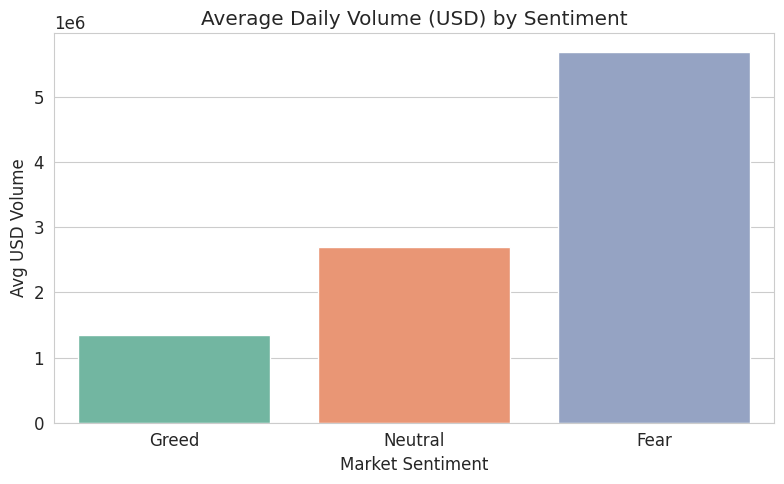

ValueError: Could not interpret value `closed_pnl` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rename for clarity (optional, keeps code consistent)
merged = merged.rename(columns={'size_usd': 'total_volume_usd'})

# 1. Average Daily Volume (USD) by Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=merged, x='sentiment_group', y='total_volume_usd', estimator=np.mean, palette='Set2', errorbar=None)
plt.title('Average Daily Volume (USD) by Sentiment')
plt.ylabel('Avg USD Volume')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/avg_volume_by_sentiment.png')
plt.show()

# 2. Distribution of Closed PnL by Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='sentiment_group', y='closed_pnl', palette='coolwarm')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.savefig('/content/outputs/pnl_distribution_by_sentiment.png')
plt.show()

# 3. Time-Series Plot: Sentiment Value vs Trading Volume
daily = merged.groupby('date').agg({'total_volume_usd':'sum', 'value':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(daily['date'], daily['value'], color='orange', label='Sentiment Value')
ax1.set_ylabel('Sentiment Value', color='orange')
ax2 = ax1.twinx()
ax2.plot(daily['date'], daily['total_volume_usd'], color='blue', alpha=0.7, label='Total Volume (USD)')
ax2.set_ylabel('Total Volume (USD)', color='blue')
plt.title('Sentiment Value vs Total Trading Volume Over Time')
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('/content/outputs/sentiment_vs_volume.png')
plt.show()

# 4. Average Execution Price by Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=merged, x='sentiment_group', y='execution_price', estimator=np.mean, palette='crest', errorbar=None)
plt.title('Average Execution Price by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Execution Price')
plt.tight_layout()
plt.savefig('/content/outputs/execution_price_by_sentiment.png')
plt.show()






In [ ]:
g_fear = merged[merged['sentiment_group']=='Fear']
g_greed = merged[merged['sentiment_group']=='Greed']

from scipy.stats import mannwhitneyu
if len(g_fear)>0 and len(g_greed)>0 and 'total_volume_usd' in merged.columns:
    s, p = mannwhitneyu(g_fear['total_volume_usd'].fillna(0), g_greed['total_volume_usd'].fillna(0), alternative='two-sided')
    print("Mann-Whitney U test (volume) p-value:", p)

if 'win_rate' in merged.columns:
    s2, p2 = mannwhitneyu(g_fear['win_rate'].fillna(0), g_greed['win_rate'].fillna(0))
    print("Mann-Whitney U test (win_rate) p-value:", p2)


In [ ]:
daily.to_csv('/content/csv_files/daily_trading_metrics.csv', index=False)
merged.to_csv('/content/csv_files/merged_trading_sentiment.csv', index=False)
print("Saved: /content/csv_files/daily_trading_metrics.csv and merged_trading_sentiment.csv")
print("Saved images in /content/outputs/")


In [ ]:
# Convert timestamp columns to datetime
db['timestamp_ist'] = pd.to_datetime(db['timestamp_ist'], errors='coerce')
db['date'] = db['timestamp_ist'].dt.date

# Convert date column in fear & greed dataset
fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date

# Merge the two datasets on 'date'
merged = pd.merge(db, fg, on='date', how='left')

# Save the merged dataset into your project folder
merged.to_csv('csv_files/merged_trading_sentiment.csv', index=False)

print("Merged dataset saved successfully!")
merged.head()


In [ ]:
# Set consistent style and larger fonts
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 6)

# Load merged dataset
merged = pd.read_csv('csv_files/merged_trading_sentiment.csv')

# Drop rows with missing sentiment
merged = merged.dropna(subset=['classification'])

# ---------------------
# 1. Sentiment Distribution
# ---------------------
plt.figure()
sns.countplot(data=merged, x='classification',
              order=merged['classification'].value_counts().index,
              palette='coolwarm', edgecolor='black')
plt.title("Market Sentiment Distribution (Fear vs Greed)")
plt.xlabel("Sentiment Classification")
plt.ylabel("Number of Days")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ---------------------
# 2. Average Profit (Closed PnL) by Sentiment
# ---------------------
plt.figure()
avg_pnl = merged.groupby('classification')['closed_pnl'].mean().reset_index()
sns.barplot(data=avg_pnl, x='classification', y='closed_pnl',
            palette='crest', edgecolor='black')
plt.title("Average Trader Profit by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ---------------------
# 3. Average Trade Volume (USD) by Sentiment
# ---------------------
plt.figure()
avg_volume = merged.groupby('classification')['size_usd'].mean().reset_index()
sns.barplot(data=avg_volume, x='classification', y='size_usd',
            palette='viridis', edgecolor='black')
plt.title("Average Trade Volume (USD) by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ---------------------
# 4. Average Start Position (Risk Exposure) by Sentiment
# ---------------------
plt.figure()
avg_pos = merged.groupby('classification')['start_position'].mean().reset_index()
sns.barplot(data=avg_pos, x='classification', y='start_position',
            palette='Set2', edgecolor='black')
plt.title("Average Start Position by Sentiment Type")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Start Position")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ---------------------
# 5. Correlation Heatmap
# ---------------------
plt.figure(figsize=(12, 8))
numeric_corr = merged.select_dtypes('number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Trader Behavior Metrics")
plt.tight_layout()
plt.show()


In [50]:
# Zip and download all charts from /content/outputs
!zip -r /content/outputs.zip /content/outputs

from google.colab import files
files.download("/content/outputs.zip")


  adding: content/outputs/ (stored 0%)
  adding: content/outputs/avg_volume_by_sentiment.png (deflated 19%)
  adding: content/outputs/pnl_distribution_by_sentiment.png (deflated 17%)
  adding: content/outputs/execution_price_by_sentiment.png (deflated 19%)
  adding: content/outputs/sentiment_vs_volume.png (deflated 3%)
  adding: content/outputs/correlation_matrix.png (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>